In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df['Loan_ID'].nunique()

614

In [6]:
df=df.set_index('Loan_ID') # as loan ID is unique and doesnt provide any information to target variable

In [7]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [8]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [10]:
df.isnull().sum()  #null values are present in the columns

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
#Replacing null values

In [12]:
df['LoanAmount']=df['LoanAmount'].fillna(np.mean(df['LoanAmount']))
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(np.mean(df['Loan_Amount_Term']))
df['Credit_History']=df['Credit_History'].fillna(np.mean(df['Credit_History']))

In [13]:
from scipy import stats as st
print(st.mode(df['Gender']))
print(st.mode(df['Married']))
print(st.mode(df['Dependents']))
print(st.mode(df['Self_Employed']))

ModeResult(mode=array(['Male'], dtype=object), count=array([489]))
ModeResult(mode=array(['Yes'], dtype=object), count=array([398]))
ModeResult(mode=array(['0'], dtype=object), count=array([345]))
ModeResult(mode=array(['No'], dtype=object), count=array([500]))


In [14]:
df['Gender']=df['Gender'].fillna('Male')
df['Married']=df['Married'].fillna('Yes')
df['Dependents']=df['Dependents'].fillna('0')
df['Self_Employed']=df['Self_Employed'].fillna('No')

In [15]:
df.isnull().sum()    #no null values are present


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

LAbel Encoding

In [16]:
# to change object data into integeral values

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Education']=le.fit_transform(df['Education'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])


In [18]:
df['Loan_Status']

Loan_ID
LP001002    1
LP001003    0
LP001005    1
LP001006    1
LP001008    1
           ..
LP002978    1
LP002979    1
LP002983    1
LP002984    1
LP002990    0
Name: Loan_Status, Length: 614, dtype: int32

In [19]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [20]:
#mean is more than the median and there is more difference between 75th percentile and median in Three columns

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 61.7+ KB


In [22]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


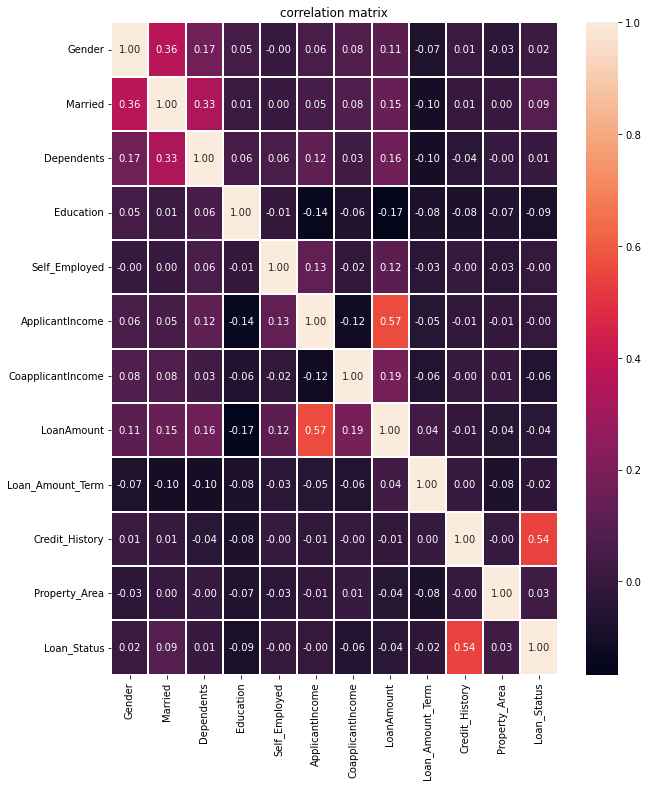

In [23]:
plt.figure(figsize=(10,12))
sns.heatmap(df.corr(),annot=True,fmt='.2f',linewidth=2)
plt.title('correlation matrix')
plt.show()

In [24]:
df.corr()['Loan_Status'].sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.020974
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540483
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

Bivariant Analysis

<AxesSubplot:xlabel='Property_Area', ylabel='Loan_Status'>

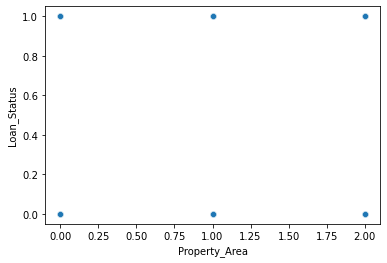

In [25]:
sns.scatterplot(x='Property_Area',y='Loan_Status',data=df)

<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Status'>

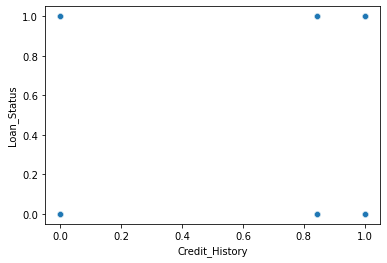

In [26]:
sns.scatterplot(x='Credit_History',y='Loan_Status',data=df)

<AxesSubplot:xlabel='Married', ylabel='Loan_Status'>

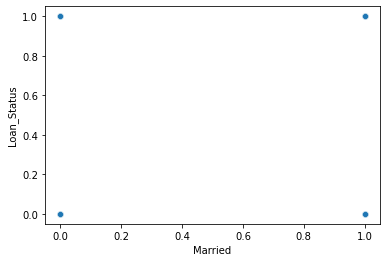

In [27]:
sns.scatterplot(x='Married',y='Loan_Status',data=df)

<AxesSubplot:xlabel='Dependents', ylabel='Loan_Status'>

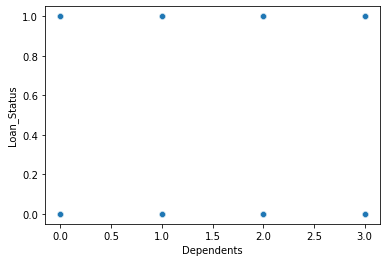

In [28]:
sns.scatterplot(x='Dependents',y='Loan_Status',data=df)

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Status'>

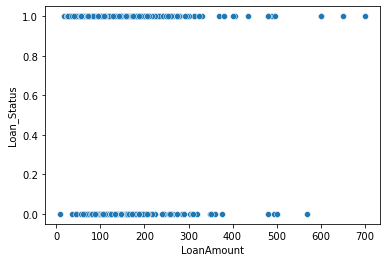

In [29]:
sns.scatterplot(x='LoanAmount',y='Loan_Status',data=df)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Loan_Status'>

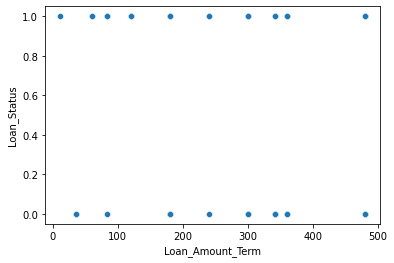

In [30]:
sns.scatterplot(x='Loan_Amount_Term',y='Loan_Status',data=df)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Loan_Status'>

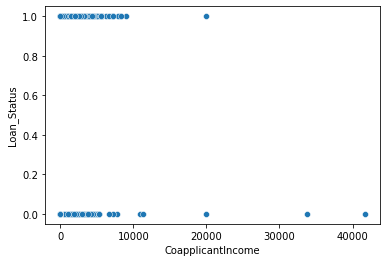

In [31]:
sns.scatterplot(x='CoapplicantIncome',y='Loan_Status',data=df)

To skewness in the data

In [32]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

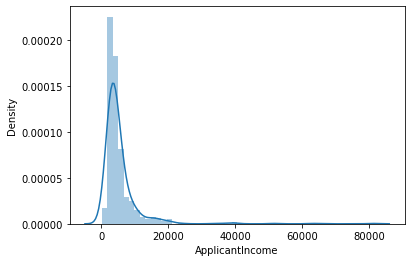

In [33]:
sns.distplot(df['ApplicantIncome'])  #skewness is present

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

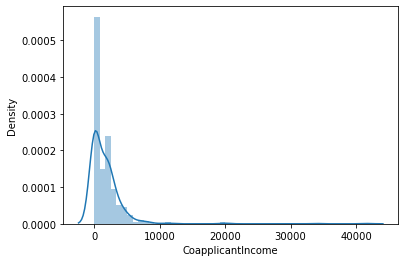

In [34]:
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

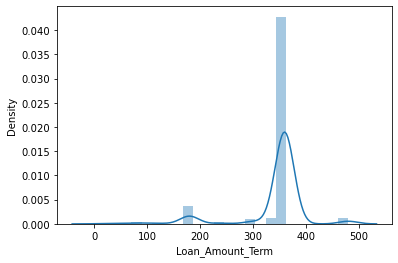

In [35]:
sns.distplot(df['Loan_Amount_Term'])

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

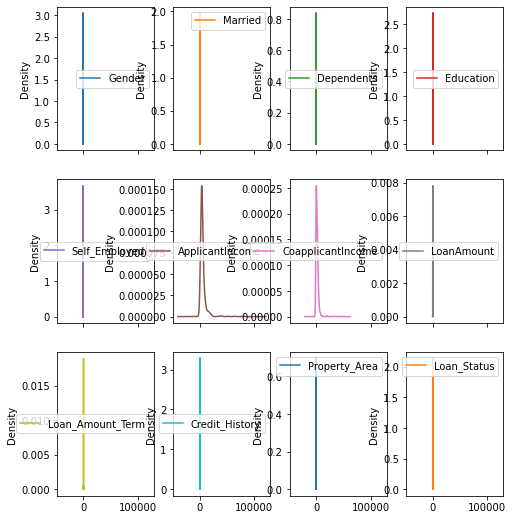

In [36]:
df.plot(kind='kde',subplots=True,layout=(3,4),figsize=(8,9))

In [37]:
#we see skewness present in applicant income and coapplicant income columns

To Check Outliers

Gender                  AxesSubplot(0.125,0.657941;0.168478x0.222059)
Married              AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Dependents           AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Education            AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Self_Employed           AxesSubplot(0.125,0.391471;0.168478x0.222059)
ApplicantIncome      AxesSubplot(0.327174,0.391471;0.168478x0.222059)
CoapplicantIncome    AxesSubplot(0.529348,0.391471;0.168478x0.222059)
LoanAmount           AxesSubplot(0.731522,0.391471;0.168478x0.222059)
Loan_Amount_Term           AxesSubplot(0.125,0.125;0.168478x0.222059)
Credit_History          AxesSubplot(0.327174,0.125;0.168478x0.222059)
Property_Area           AxesSubplot(0.529348,0.125;0.168478x0.222059)
Loan_Status             AxesSubplot(0.731522,0.125;0.168478x0.222059)
dtype: object

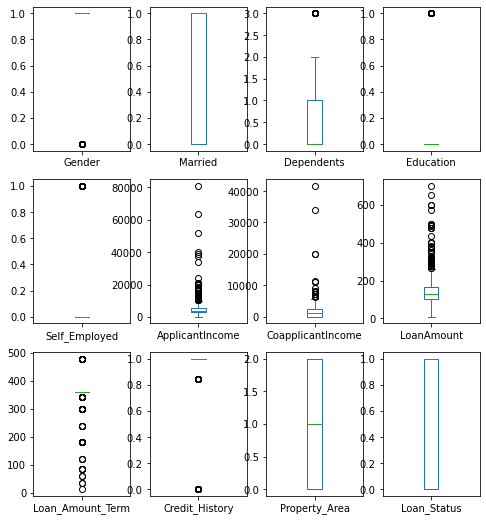

In [38]:
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(8,9))

#outliers are present in the data

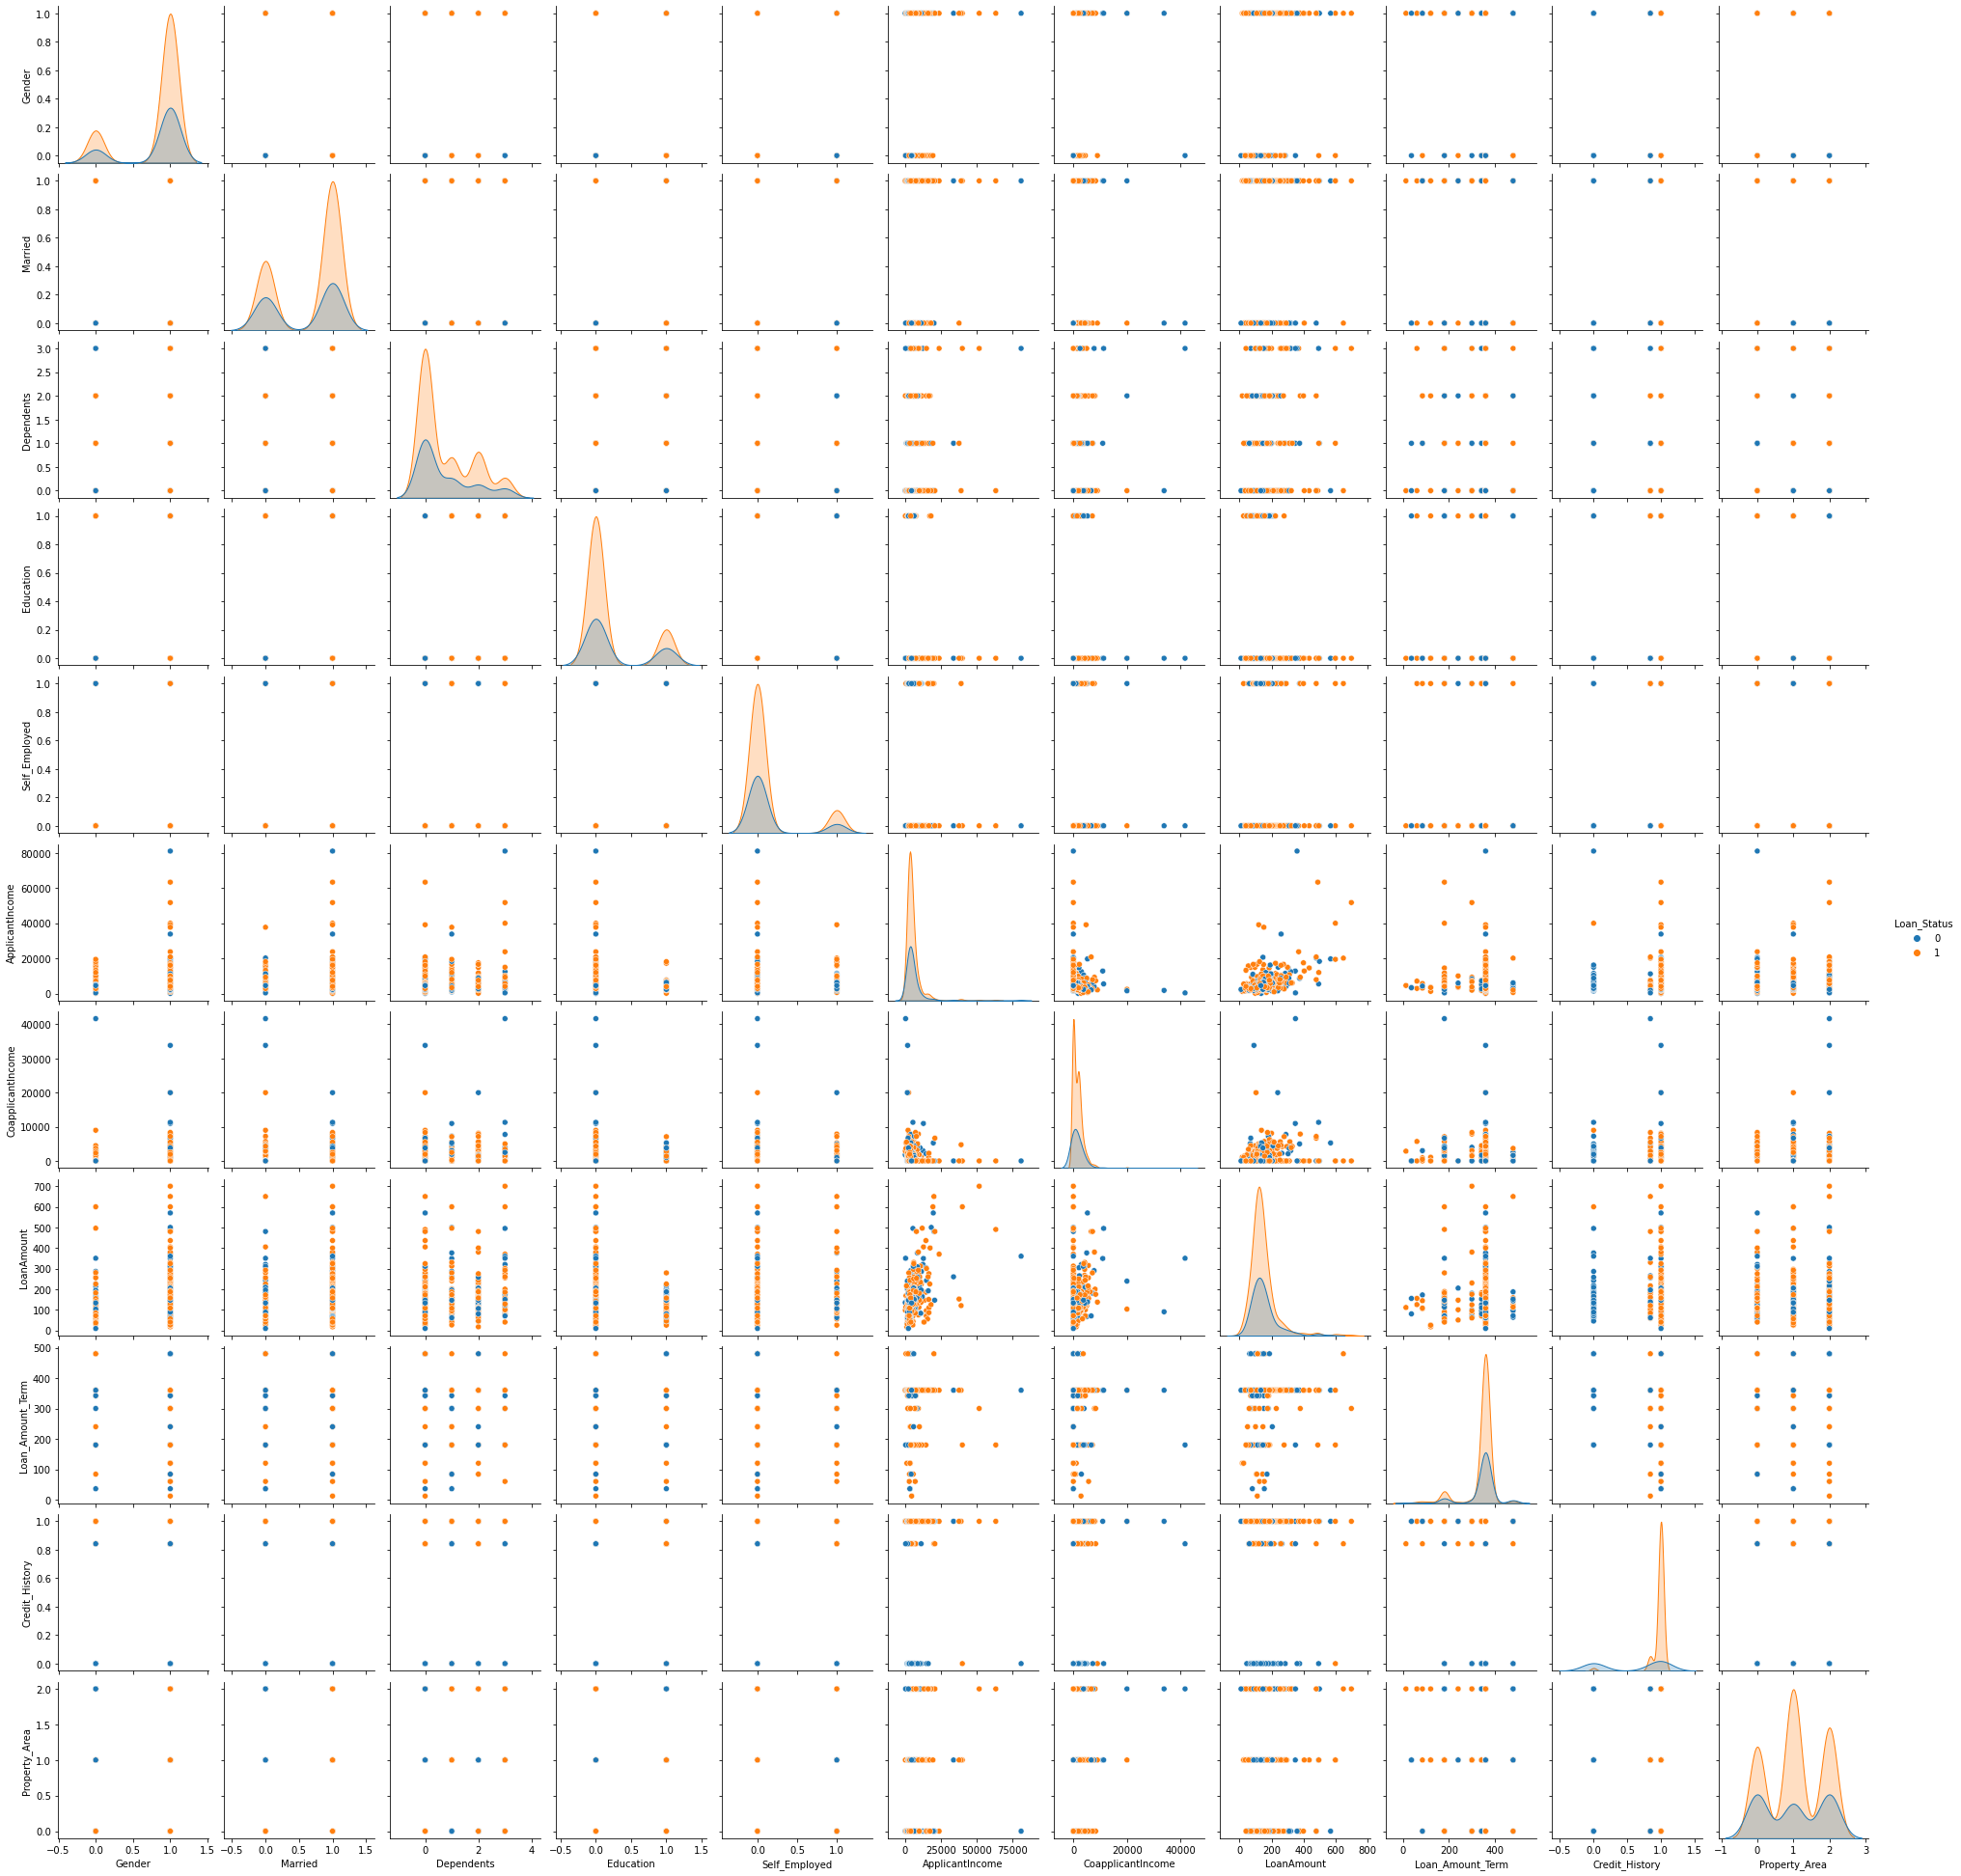

In [39]:
sns.pairplot(df,hue='Loan_Status')  # to find the relationship among all the columns
plt.show()

To remove Outliers

In [40]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(614, 12)

In [41]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [42]:
len(np.where(z>3)[0])

41

In [43]:
df_new=df[(z<3).all(axis=1)]

In [44]:
print('old shape',df.shape)
print('newshape',df_new.shape)

old shape (614, 12)
newshape (577, 12)


In [45]:
loss_data=(614-577)/614*100
print('% of loss',loss_data)

% of loss 6.026058631921824


In [46]:
#we find 6% of loss in data when outliers are removed 

In [47]:
#splitting of data

In [48]:
x=df_new.drop(['Loan_Status'],axis=1)  #splitting the data

In [49]:
y=df_new['Loan_Status']

In [50]:
y

Loan_ID
LP001002    1
LP001003    0
LP001005    1
LP001006    1
LP001008    1
           ..
LP002978    1
LP002979    1
LP002983    1
LP002984    1
LP002990    0
Name: Loan_Status, Length: 577, dtype: int32

Machine learning Model

In [51]:
from sklearn.preprocessing import power_transform  #to remove skewness in the data before training the model
x=power_transform(x,method='yeo-johnson')

In [52]:
x

array([[ 0.47713685, -1.36251079, -0.80924269, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.14260892,
         0.51523634, -1.34019905],
       [ 0.47713685,  0.73393914, -0.80924269, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       ...,
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       [ 0.47713685,  0.73393914,  1.34467098, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       [-2.09583477, -1.36251079, -0.80924269, ...,  0.14260892,
        -2.22500746,  0.01546372]])

In [53]:
from sklearn.preprocessing import StandardScaler   #scaling the model to normal distribution
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.47713685, -1.36251079, -0.80924269, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.14260892,
         0.51523634, -1.34019905],
       [ 0.47713685,  0.73393914, -0.80924269, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       ...,
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       [ 0.47713685,  0.73393914,  1.34467098, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       [-2.09583477, -1.36251079, -0.80924269, ...,  0.14260892,
        -2.22500746,  0.01546372]])

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

knn=KNeighborsClassifier()
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()


model=[lg,gnb,svc,dtc,knn]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
for m in model:
    m.fit(x_train,y_train)
    m.score(x_test,y_test)
    predm=m.predict(x_test)
    print ('accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of LogisticRegression() is:
0.7241379310344828
[[11 24]
 [ 8 73]]
              precision    recall  f1-score   support

           0       0.58      0.31      0.41        35
           1       0.75      0.90      0.82        81

    accuracy                           0.72       116
   macro avg       0.67      0.61      0.61       116
weighted avg       0.70      0.72      0.70       116



accuracy score of GaussianNB() is:
0.6896551724137931
[[14 21]
 [15 66]]
              precision    recall  f1-score   support

           0       0.48      0.40      0.44        35
           1       0.76      0.81      0.79        81

    accuracy                           0.69       116
   macro avg       0.62      0.61      0.61       116
weighted avg       0.68      0.69      0.68       116



accuracy score of SVC() is:
0.7413793103448276
[[11 24]
 [ 6 75]]
              precision    recall  f1-score   support

           0       0.65      0.31      0.42        35
           1 

In [55]:
# we are getting highest accuracy 

In [56]:
# we see imblance in data set at the target columns so we apply smote to this data set.

In [57]:
df_new['Loan_Status'].value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [58]:
from imblearn.over_sampling import SMOTE   #applying smote for imbalanced data

In [59]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [60]:
trainx.shape #data is now balanced 

(796, 11)

In [61]:
trainy.shape

(796,)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

knn=KNeighborsClassifier()
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()


model=[lg,gnb,svc,dtc,knn]
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=0.20)  #using balanced data
for m in model:
    m.fit(x_train,y_train)
    m.score(x_test,y_test)
    predm=m.predict(x_test)
    print ('accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of LogisticRegression() is:
0.70625
[[46 37]
 [10 67]]
              precision    recall  f1-score   support

           0       0.82      0.55      0.66        83
           1       0.64      0.87      0.74        77

    accuracy                           0.71       160
   macro avg       0.73      0.71      0.70       160
weighted avg       0.74      0.71      0.70       160



accuracy score of GaussianNB() is:
0.6875
[[47 36]
 [14 63]]
              precision    recall  f1-score   support

           0       0.77      0.57      0.65        83
           1       0.64      0.82      0.72        77

    accuracy                           0.69       160
   macro avg       0.70      0.69      0.68       160
weighted avg       0.71      0.69      0.68       160



accuracy score of SVC() is:
0.7125
[[47 36]
 [10 67]]
              precision    recall  f1-score   support

           0       0.82      0.57      0.67        83
           1       0.65      0.87      0.74     

In [63]:
# after applying smote the accuracy for DTC has become 82%

Cross validation

In [87]:
from sklearn.model_selection import cross_val_score
dtc.fit(x_train,y_train)
pred_test=dtc.predict(x_test)
lss=accuracy_score(y_test,pred_test)
for j in range(2,10):
    lsscore= cross_val_score(dtc,trainx,trainy,cv=j)
    lsc= lsscore.mean()
    print('at cv=',j)
    print('cross validation score is',lsc *100)
    print('accuracy_score is',lss*100)
    print('\n')

at cv= 2
cross validation score is 74.74874371859298
accuracy_score is 81.875


at cv= 3
cross validation score is 77.89568260273325
accuracy_score is 81.875


at cv= 4
cross validation score is 75.12562814070351
accuracy_score is 81.875


at cv= 5
cross validation score is 76.6383647798742
accuracy_score is 81.875


at cv= 6
cross validation score is 76.14111035163667
accuracy_score is 81.875


at cv= 7
cross validation score is 78.40841040654735
accuracy_score is 81.875


at cv= 8
cross validation score is 77.16287878787878
accuracy_score is 81.875


at cv= 9
cross validation score is 77.92248325956191
accuracy_score is 81.875




In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
grid_param={
    'criterion':['gini','entropy']
}
gd_sr=GridSearchCV(estimator=dtc,
                   param_grid=grid_param,
                   scoring='accuracy',
                   cv=5)
gd_sr.fit(trainx,trainy)
best_parameters=gd_sr.best_params_
print(best_parameters)


{'criterion': 'entropy'}


In [89]:
gd_sr_predictions = gd_sr.predict(x_test)
 
# print classification report
print(classification_report(y_test,gd_sr_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        77

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



In [90]:
# using GridSearch Cv and hyper paramter tuning we are getting 100% accuracy and f1 score 0f 1 which is excelent

In [91]:
# since we are getting good accuracy with Grid SearchCv we dont require Ensemble method anymore

To Plot ROC AUC curve

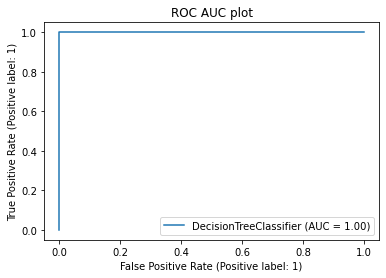

In [92]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gd_sr.best_estimator_,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

In [ ]:
# Using Decision Tree classifier we found that the model is able to differentiate among the target variable at 100% accuracy.

In [93]:
#saving the model

import joblib
joblib.dump(gd_sr.best_estimator_,'loan.pkl')

['loan.pkl']